In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

--2023-07-09 15:04:09--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-09 15:04:09--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc95dedd76d18298150f7d2bdb0f.dl.dropboxusercontent.com/zip_download_get/Bi4dRtE_38nc8lhObvSakFZ6pC6aId6Q8rNXS3UQI4JzZ1QqpW2dsX0hSoILFLeCXfDRF4xCHVmNtvLN6pZ7QGdYRITRMYY-hfU50qhmxoDtmQ# [following]
--2023-07-09 15:04:10--  https://uc95dedd76d18298150f7d2bdb0f.dl.dropboxusercontent.com/zip_download_get/Bi4dRtE_38nc8lhObvSakFZ6pC6aId6Q8rNXS3UQI4JzZ1QqpW2dsX0hSoILFLeCXfDRF4xCHVmNtvLN6pZ7QGdYRITRMYY-h

In [3]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
replace images/Train/Pikachu/345.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Train/Pikachu/341.jpg  
 extracting: images/Train/Pikachu/298.jpg  
 extracting: images/Train/Pikachu/389.jpg  
 extracting: images/Train/Pikachu/382.jpg  
 extracting: images/Train/Pikachu/306.j

In [4]:
!pip install keras_preprocessing

In [5]:
classes = os.listdir(path = '/content/images/Train')      # extract classes

In [6]:
classes

['Charmander', 'Pikachu', 'Bulbasaur']

In [7]:
for pokemon_type in classes:
  path = 'images/Train/' + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")  # number of images in each classes

Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [8]:
for pokemon_type in classes:
  path = 'images/Test/' + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 42
Pikachu - 40
Bulbasaur - 41


In [9]:
from keras_preprocessing import image

In [10]:
train_data = []
train_labels = []

In [37]:
test_data = []
test_labels = []

In [11]:
for category in classes:
  folder = f"images/Train/{category}"
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder,image_name)
    img = image.load_img(img_path,target_size = (100,100))  #reshape image to size 100 by 100
    img_array = image.img_to_array(img)
    train_data.append(img_array)
    train_labels.append(category)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [38]:
for category in classes:
  folder = f"images/Test/{category}"
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder,image_name)
    img = image.load_img(img_path,target_size = (100,100))  #reshape image to size 100 by 100
    img_array = image.img_to_array(img)
    test_data.append(img_array)
    test_labels.append(category)

In [12]:
len(train_data)

304

In [39]:
len(test_data)

123

In [13]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [14]:
train_data = train_data.reshape(len(train_data),30000)

In [15]:
train_data.shape

(304, 30000)

In [40]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [43]:
test_data = test_data.reshape(len(test_data),30000)

In [46]:
test_data.shape

(123, 30000)

In [16]:
category2label =  {"Pikachu":0,"Charmander":1,"Bulbasaur":2}
label2category = {0:"Pikachu",1:"Charmander",2:"Bulbasaur"}

In [17]:
train_labels = np.array([category2label[label] for label in train_labels])

In [47]:
test_labels = np.array([category2label[label] for label in test_labels])

In [19]:
from keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
train_labels

In [ ]:
test_labels = to_categorical(test_labels)
test_labels

In [21]:
from keras.layers import Dense
from keras import Sequential

In [22]:
features = train_data.shape[1]

In [23]:
model = Sequential()

In [28]:
from keras.layers.attention.multi_head_attention import activation
model.add(Dense(units=512, activation ='relu', input_shape =(features,)))

In [29]:
model.add(Dense(units=256, activation ='relu'))

In [30]:
model.add(Dense(units=128, activation ='relu'))

In [31]:
model.add(Dense(units=64, activation ='relu'))

In [32]:
model.add(Dense(units=3,activation='softmax'))

In [33]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               15360512  
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(train_data,train_labels,batch_size = 32,epochs=50)

Epoch 1/50
10/10 [==============================] - 5s 327ms/step - loss: 2294.7422 - accuracy: 0.3618
Epoch 2/50
10/10 [==============================] - 3s 253ms/step - loss: 1430.1667 - accuracy: 0.4474
Epoch 3/50
10/10 [==============================] - 3s 251ms/step - loss: 923.2868 - accuracy: 0.4868
Epoch 4/50
10/10 [==============================] - 3s 255ms/step - loss: 724.9492 - accuracy: 0.6053
Epoch 5/50
10/10 [==============================] - 3s 351ms/step - loss: 410.1908 - accuracy: 0.6678
Epoch 6/50
10/10 [==============================] - 3s 253ms/step - loss: 110.8036 - accuracy: 0.8289
Epoch 7/50
10/10 [==============================] - 3s 253ms/step - loss: 78.6727 - accuracy: 0.8520
Epoch 8/50
10/10 [==============================] - 3s 254ms/step - loss: 49.7963 - accuracy: 0.8849
Epoch 9/50
10/10 [==============================] - 3s 252ms/step - loss: 62.9327 - accuracy: 0.8816
Epoch 10/50
10/10 [==============================] - 4s 368ms/step - loss: 79.3171 

In [56]:
loss , accuracy = model.evaluate(test_data,test_labels)
print(f'Test Data Loss:{loss:.4f}')
print(f'Test Data accuracy:{accuracy:.4f}')

4/4 [==============================] - 0s 31ms/step - loss: 9.9862 - accuracy: 0.9675
Test Data Loss:9.9862
Test Data accuracy:0.9675


In [41]:
test_image = '/content/pikachu1.jpg'

img = image.load_img(test_image,target_size = (100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

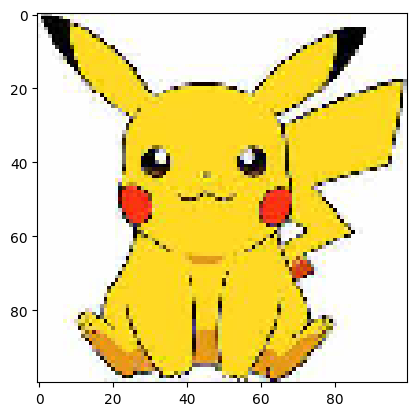

In [45]:
plt.imshow(img.astype('int'));

In [49]:
img = img.reshape(1,30000)

In [50]:
model.predict(img).argmax()

1/1 [==============================] - 0s 113ms/step


0

In [53]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 29ms/step


'Pikachu'